In [1]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

In [2]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
# https://seaborn.pydata.org/
# "Seaborn is a Python data visualization library based on matplotlib. 
# It provides a high-level interface for drawing attractive and informative statistical graphics."
import seaborn as sns
# switch to seaborn figure aesthetic defaults
#sns.set_theme()
sns.set()


# Computational Mathematics  <a class="tocSkip">
    
## Probability (and some first steps towards Machine Learning from a probabilistic perspective) <a class="tocSkip">

## Learning objectives  <a class="tocSkip">
   
<br>
   
1. Revision of some introductory statistics concepts.

<br>

2. Revision of some basic probability and uncertainty concepts.

<br>

3. Introduction of some initial machine learning concepts with some optional reading that will take some steps towards ML that will be picked up in your next two modules.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Some-background-reading-on-definitions" data-toc-modified-id="Some-background-reading-on-definitions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Some background reading on definitions</a></span></li></ul></li><li><span><a href="#Statistics" data-toc-modified-id="Statistics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Statistics</a></span><ul class="toc-item"><li><span><a href="#Mean,-variance,-standard-deviation,-and-z-score" data-toc-modified-id="Mean,-variance,-standard-deviation,-and-z-score-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Mean, variance, standard deviation, and z-score</a></span><ul class="toc-item"><li><span><a href="#Mean-(average)" data-toc-modified-id="Mean-(average)-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Mean (average)</a></span></li><li><span><a href="#Variance" data-toc-modified-id="Variance-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Variance</a></span><ul class="toc-item"><li><span><a href="#Aside---What's-the-link-between-mean-and-variance-with-regression?-...-A-thought-exercise" data-toc-modified-id="Aside---What's-the-link-between-mean-and-variance-with-regression?-...-A-thought-exercise-2.1.2.1"><span class="toc-item-num">2.1.2.1&nbsp;&nbsp;</span>Aside - What's the link between mean and variance with regression? ... A thought exercise</a></span></li></ul></li><li><span><a href="#Standard-deviation" data-toc-modified-id="Standard-deviation-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Standard deviation</a></span><ul class="toc-item"><li><span><a href="#Population-vs-sample-mean/variance/standard-deviation" data-toc-modified-id="Population-vs-sample-mean/variance/standard-deviation-2.1.3.1"><span class="toc-item-num">2.1.3.1&nbsp;&nbsp;</span>Population vs sample mean/variance/standard deviation</a></span></li></ul></li><li><span><a href="#Standard-score-(z-score)" data-toc-modified-id="Standard-score-(z-score)-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Standard score (z-score)</a></span></li></ul></li><li><span><a href="#Example:-the-Iris-dataset" data-toc-modified-id="Example:-the-Iris-dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Example: the Iris dataset</a></span></li><li><span><a href="#Covariance-and-correlation-coefficient" data-toc-modified-id="Covariance-and-correlation-coefficient-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Covariance and correlation coefficient</a></span><ul class="toc-item"><li><span><a href="#Covariance" data-toc-modified-id="Covariance-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Covariance</a></span></li><li><span><a href="#Covariance-matrix" data-toc-modified-id="Covariance-matrix-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Covariance matrix</a></span></li><li><span><a href="#Correlation-coefficient" data-toc-modified-id="Correlation-coefficient-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Correlation coefficient</a></span></li></ul></li></ul></li><li><span><a href="#Probability-and-Uncertainty" data-toc-modified-id="Probability-and-Uncertainty-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Probability and Uncertainty</a></span><ul class="toc-item"><li><span><a href="#Random-variables" data-toc-modified-id="Random-variables-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Random variables</a></span><ul class="toc-item"><li><span><a href="#More-definitions-(for-completeness-and-reference---you-don't-need-to-memorise)" data-toc-modified-id="More-definitions-(for-completeness-and-reference---you-don't-need-to-memorise)-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>More definitions (for completeness and reference - you don't need to memorise)</a></span></li><li><span><a href="#Discrete-and-continuous-random-variables" data-toc-modified-id="Discrete-and-continuous-random-variables-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Discrete and continuous random variables</a></span></li></ul></li><li><span><a href="#Probability" data-toc-modified-id="Probability-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Probability</a></span><ul class="toc-item"><li><span><a href="#Properties" data-toc-modified-id="Properties-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Properties</a></span></li><li><span><a href="#Notation" data-toc-modified-id="Notation-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Notation</a></span></li></ul></li><li><span><a href="#Probability-Distribution-Function" data-toc-modified-id="Probability-Distribution-Function-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Probability Distribution Function</a></span><ul class="toc-item"><li><span><a href="#Probability-Mass-Functions" data-toc-modified-id="Probability-Mass-Functions-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Probability Mass Functions</a></span></li><li><span><a href="#Properties-of-Probability-Mass-Functions" data-toc-modified-id="Properties-of-Probability-Mass-Functions-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Properties of Probability Mass Functions</a></span></li><li><span><a href="#Simulation-of-a-die-rolling-experiment" data-toc-modified-id="Simulation-of-a-die-rolling-experiment-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Simulation of a die-rolling experiment</a></span></li><li><span><a href="#Probability-Density-Functions" data-toc-modified-id="Probability-Density-Functions-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Probability Density Functions</a></span></li><li><span><a href="#Example-1" data-toc-modified-id="Example-1-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Example 1</a></span></li><li><span><a href="#Cumulative-distribution-function" data-toc-modified-id="Cumulative-distribution-function-3.3.6"><span class="toc-item-num">3.3.6&nbsp;&nbsp;</span>Cumulative distribution function</a></span></li><li><span><a href="#Example-2" data-toc-modified-id="Example-2-3.3.7"><span class="toc-item-num">3.3.7&nbsp;&nbsp;</span>Example 2</a></span></li></ul></li><li><span><a href="#Central-Limit-Theorem" data-toc-modified-id="Central-Limit-Theorem-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Central Limit Theorem</a></span></li><li><span><a href="#Joint-Probability" data-toc-modified-id="Joint-Probability-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Joint Probability</a></span><ul class="toc-item"><li><span><a href="#Notation" data-toc-modified-id="Notation-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Notation</a></span></li><li><span><a href="#Dependent-and-Independent-Events" data-toc-modified-id="Dependent-and-Independent-Events-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Dependent and Independent Events</a></span></li><li><span><a href="#Joint-Probability-of-Independent-and-Dependent-Events" data-toc-modified-id="Joint-Probability-of-Independent-and-Dependent-Events-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Joint Probability of Independent and Dependent Events</a></span><ul class="toc-item"><li><span><a href="#Independent-Events" data-toc-modified-id="Independent-Events-3.5.3.1"><span class="toc-item-num">3.5.3.1&nbsp;&nbsp;</span>Independent Events</a></span></li><li><span><a href="#Dependent-Events" data-toc-modified-id="Dependent-Events-3.5.3.2"><span class="toc-item-num">3.5.3.2&nbsp;&nbsp;</span>Dependent Events</a></span></li></ul></li><li><span><a href="#Marginal-Probabilities-and-the-Sum-Rule" data-toc-modified-id="Marginal-Probabilities-and-the-Sum-Rule-3.5.4"><span class="toc-item-num">3.5.4&nbsp;&nbsp;</span>Marginal Probabilities and the Sum Rule</a></span></li><li><span><a href="#The-Iris-dataset-revisited" data-toc-modified-id="The-Iris-dataset-revisited-3.5.5"><span class="toc-item-num">3.5.5&nbsp;&nbsp;</span>The Iris dataset revisited</a></span></li></ul></li><li><span><a href="#Conditional-Probability" data-toc-modified-id="Conditional-Probability-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Conditional Probability</a></span><ul class="toc-item"><li><span><a href="#Car-example" data-toc-modified-id="Car-example-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Car example</a></span></li><li><span><a href="#The-product-rule-of-probability" data-toc-modified-id="The-product-rule-of-probability-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>The product rule of probability</a></span></li><li><span><a href="#Car-example---revisited" data-toc-modified-id="Car-example---revisited-3.6.3"><span class="toc-item-num">3.6.3&nbsp;&nbsp;</span>Car example - revisited</a></span></li><li><span><a href="#More-events" data-toc-modified-id="More-events-3.6.4"><span class="toc-item-num">3.6.4&nbsp;&nbsp;</span>More events</a></span></li></ul></li></ul></li><li><span><a href="#Machine-Learning,-Data-Science---&quot;simple&quot;-methods-and-links-to-probability" data-toc-modified-id="Machine-Learning,-Data-Science---&quot;simple&quot;-methods-and-links-to-probability-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Machine Learning, Data Science - "simple" methods and links to probability</a></span><ul class="toc-item"><li><span><a href="#Some-initial-definitions" data-toc-modified-id="Some-initial-definitions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Some initial definitions</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Qualitative-data" data-toc-modified-id="Qualitative-data-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Qualitative data</a></span></li><li><span><a href="#Quantitative-data" data-toc-modified-id="Quantitative-data-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Quantitative data</a></span></li></ul></li><li><span><a href="#Supervised-learning-(classification-|-regression)" data-toc-modified-id="Supervised-learning-(classification-|-regression)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Supervised learning (classification | regression)</a></span></li><li><span><a href="#Bayes'-Theorem" data-toc-modified-id="Bayes'-Theorem-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Bayes' Theorem</a></span></li><li><span><a href="#Naive-Bayes-classifier" data-toc-modified-id="Naive-Bayes-classifier-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Naive Bayes classifier</a></span><ul class="toc-item"><li><span><a href="#Accuracy-of-our-classifier" data-toc-modified-id="Accuracy-of-our-classifier-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Accuracy of our classifier</a></span></li></ul></li><li><span><a href="#Other-classification-and-regression-models" data-toc-modified-id="Other-classification-and-regression-models-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Other classification and regression models</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Introduction

*Data science* (and *machine learning*) tries to find patterns and extract knowledge from data. 

It is a common practice in science to use observations to help understand systems. 
We typically do that by building a model to represent the system using mathematical concepts. 

We've seen and discussed these concept several times already.
We also noted the famous saying which we should always keep in mind


<br>


> "All models are wrong, some are useful" - George Box


<br>

To make sense of data, we have to deal with uncertainty. 

There are multiple possible sources of uncertainty. 

It can come from the data itself, from the data that you do not have, from the inherent randomness (or stochasticity*) of the system you want to model, from simplifying assumptions made in your model, etc.

The goal of probability is to deal with uncertainty. 

<br>

[* "Although stochasticity and randomness are distinct in that the former refers to a modeling approach and the latter refers to phenomena themselves, these two terms are often used synonymously" <https://en.wikipedia.org/wiki/Stochastic>]

## Some background reading on definitions

<br>

- Probability vs Statistics <https://towardsdatascience.com/probability-vs-statistics-95f221cc74f7>

> "Probability theory is a branch of mathematics concerned with probability. Probability is a numerical description of the likelihood of an event. A lot of times by saying probability, we refer to probability theory and not just the number. This is understandable by the context of the sentence.

> Statistics is a branch of mathematics that concerns the collection, organization, displaying, analysis, interpretation and presentation of data.

> The relationship between those two is that in statistics, we apply probability(probability theory) to draw conclusions from data."

<br>

<br>

- What's the difference between probability and statistics? <https://stats.stackexchange.com/questions/665/whats-the-difference-between-probability-and-statistics>

# Statistics

First let's quickly review some concepts from introductory statistics.

## Mean, variance, standard deviation, and z-score
Suppose we have a set of values (*dataset*) 

$$\{x_1, x_2, \ldots, x_n\}$$ 

that have been obtained by measuring/observing a property of some system we want to understand. 

<br>

For instance, $x_i$ could be the prices of houses in London, or blood pressure readings of patients in a medical trial studying the effectiveness of a new treatment. 

<br>

We can write our one-dimensional dataset as a vector 

$$\mathbf{x} = [x_1, x_2, \ldots, x_n]^T$$ 


The size of the dataset $n$ can range from only a few to many billions. 

Looking at the values one by one trying to find patterns in the data would most probably not lead us to a useful understanding of the system. 

What first statistical values can we extract from our dataset to help us start to better understand the system (via the data)?

### Mean (average)

The *mean* of a vector $\mathbf{x} = [x_1, x_2, \ldots, x_n]^T$, usually denoted as $\bar{x}$, is typically taken to be the arithmetic mean (average) of its elements, i.e. the sum of its components $x_i$ divided by the number of components $n$: 

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i
$$

We interpret the mean as the middle (or the central point) of our dataset around which all values are equally distributed.

<br>

Note: There are other "means" such as the *harmonic mean* ($HM$) and the *geometric mean* ($GM$), but when we use *mean* with no qualifiers, we are typically referring to the *arithmetic mean* ($AM$) as above. 

Together these are termed the three classical [*Pythagorean means*](https://en.wikipedia.org/wiki/Pythagorean_means). 

Similar to what we observed for norms in L4, there is an ordering of their magnitudes (in the case that the $x$ data are all positive) ($HM\le GM \le AM$)

<br>

NB. The *median* and the *mode* are other examples of [*averages*](https://en.wikipedia.org/wiki/Average).

In [3]:
# We can use np.mean to find the arithmetic mean:

# datasets
x = np.array([-15, 1, 9, 25])
y = np.array([3, 4, 6, 7])

# (arithmetic) means of these two datasets
print('mean(x) = {}'.format(np.mean(x)))
print('mean(y) = {}'.format(np.mean(y)))

# For the geometric and harmonic means, and checking the above comment on the ordering for positive data (hence use of y data)

print('\n Pythagorean means of y: ',st.hmean(y), st.gmean(y), np.mean(y))

mean(x) = 5.0
mean(y) = 5.0

 Pythagorean means of y:  4.48 4.738137220537587 5.0


### Variance

The [*variance*](https://en.wikipedia.org/wiki/Variance), or to be precise, the *population variance*, is a value describing how the data is spread around the centre of our data (mean). 

A dataset with a large variance means that the data points are spread far away from the mean. 

On the other hand, a dataset with a small variance means that the data points are grouped closely around the mean. 

<br>

For example, datasets: 

$$\mathbf{x} = [-15, 1, 9, 25]^T$$ 

and 

$$\mathbf{y} = [3, 4, 6, 7]^T$$ 

have the same mean $\bar{x} = \bar{y} = 5$, but data points in $\mathbf{x}$ are further away from the mean than the data points in $\mathbf{x}$ - we say that dataset $\mathbf{x}$ has higher variance than dataset $\mathbf{y}$. 

<br>

For each data point in our dataset, we can compute the distance from the mean $(x_i - \bar{x})$. 

Now, if we take the average of the squared distances from the mean, we obtain the *variance* $\mathrm{Var}(\mathbf{x})$ of our dataset $\mathbf{x}$:

$$
\mathrm{Var}(\mathbf{x}) = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2
$$

<br>
<br>

For discussions on why we take the square  of the differences see <https://stats.stackexchange.com/questions/118/why-square-the-difference-instead-of-taking-the-absolute-value-in-standard-devia> and comments on the potential advatages of just taking the absolute mean difference: <https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1467-8527.2005.00304.x>.

Note the overlap with discussions over RMSE vs MAE!

In [4]:
# datasets
x = np.array([-15, 1, 9, 25])
y = np.array([3, 4, 6, 7])

# Variances
print('Var(x) = {}'.format(np.var(x)))
print('Var(y) = {}'.format(np.var(y)))

Var(x) = 208.0
Var(y) = 2.5


#### Aside - What's the link between mean and variance with regression? ... A thought exercise

Thought exercise: If we start from our dataset and seek to perform least-squares based curve-fitting or regression using a constant function, what are other words for the value of our approximating function and the corresponding mean square error that is being minimised in the least-squares approach?

In [5]:
# Consider our dataset
x = np.array([-15, 1, 9, 25])

# Re-use code from L5
degree = 0
# we need two vectors, assume our data (variable x) has corresponding "x" dat just goven by 0,1,2,3 - result not dependent on this choice 
poly_coeffs = np.polyfit(np.arange(4), x, degree)
print('poly_coeffs: ',poly_coeffs)

def sqr_error(p, xi, yi):
    """"function to evaluate the sum of square of errors"""
    # first compute the square of the differences
    diff2 = (p(xi)-yi)**2
    # and return their sum
    return diff2.sum()

p = np.poly1d(poly_coeffs)
print('square of the difference between the data and the '
          'polynomial of degree 0 = ',sqr_error(p, np.arange(4), x))
print('and so the average of the squares of the errors is ',sqr_error(p, np.arange(4), x)/len(x))

poly_coeffs:  [5.]
square of the difference between the data and the polynomial of degree 0 =  832.0
and so the average of the squares of the errors is  208.0


### Standard deviation

The *standard deviation* (or population SD) is simply the square root of the variance. It is usually denoted as $\sigma$:

$$
\sigma(x) = \sqrt{\mathrm{Var}(\mathbf{x})} = \sqrt{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2}
$$

Both the variance and the standard deviation are *dispersion indicators*: they quantify how the values in a dataset are dispersed around the mean. 

Note that the units (or dimension) of variance is the square of the units of the observations, whereas the standard deviation has the same units. 

Both the variance and the standard deviation are always positive (like a distance, measuring how far away the data points are from the mean):

$$
\mathrm{Var}(x) \geq 0, \quad \sigma(x) \geq 0
$$

<br>
<br>

Aside: Recall that we made a similar observation when commenting on the mean square error (MSE) vs the root mean square error (RMSE). We don't need to take square roots (redudent flops), nor indeed take the average, when minimising using this quantity within an algorithm, but we may want to ultimately average and take square roots when reporting or comparing methods.


In [6]:
# datasets
x = np.array([-15, 1, 9, 25])
y = np.array([3, 4, 6, 7])

# standard deviations
print('std_dev(x) = {}'.format(np.std(x)))
print('std_dev(y) = {}'.format(np.std(y)))
print(np.isclose(st.tstd(x)**2,st.tvar(x)))

std_dev(x) = 14.422205101855956
std_dev(y) = 1.5811388300841898
True


#### Population vs sample mean/variance/standard deviation

In statistics, it is important to differentiate between the population and a sample. 

The *population* is the exhaustive set of all members of a specified group. e.g. if we are interested in working with house prices in London, the set of every single house in London is the population. 

The above discussion about variance (and SD) is about *population variance*. The formula above (with a sum over $n$ values) is only valid when the dataset consists of the entire population. 

Getting data for the entire population is often difficult, if not impossible. 
More commonly, we work with a *sample* from a large population, which is a subset of the whole population. 

In this case, we are interested in using the data from the *sample* to estimate the mean/variance of the *population*. 

<br>

The mean of a sample represents a good estimate for the mean of the population. 
In other words, the sample mean is an [*unbiased estimator*](https://en.wikipedia.org/wiki/Bias_of_an_estimator) of the population mean. 

<br>

However, the variance (and standard deviation) of a sample is often less than the variance of the population the sample is from. 
In other words, the sample variance is a [*biased estimator*](https://en.wikipedia.org/wiki/Bias_of_an_estimator) of the population variance. 

Hence, we must make a distinction between calculating the population variance directly and using the sample variance to *estimate* population variance. 

<br>

NB. The sample mean/variance can also be referred to as the empirical mean/variance ("empirical" meaning based on observation(s)).

<br>

From <https://en.wikipedia.org/wiki/Bessel%27s_correction>

>"The sum of squares of the distance from samples to the population mean will always be bigger than the sum of squares of the distance to the sample mean, except when the sample mean happens to be the same as the population mean, in which case the two are equal....
That is why the sum of squares of the deviations from the sample mean is too small to give an unbiased estimate of the population variance when the average of those squares is found. The smaller the sample size, the larger is the difference between the sample variance and the population variance."

<br>

A way to see this

Consider our dataset and assume this is the entire polulation

$$\mathbf{y} = [3, 4, 6, 7]^T$$ 

with mean 5 and variance 2.5.
 
Now take the first entry only as our sample, its mean is 3 and its variance (using this same sample mean in the calculation) is 0. 

Take the final entry of $y$ as our sample, ... mean 7, variance again 0.

So these samples give arguably reasonable, and unbiased estimates of the pop mean, but the variance (calculated using the sample mean which is all we may know) is always biased in being too low.

##### Aside:  Bessel's correction

NB. In case of the biased estimate of the population variance, we can apply a [correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). 

The correction turns out to be to just divide through by one less than the sample size, instead of the sample size (i.e. $n-1$ rather than $n$). Dividing by this slightly smaller number corrects for the bias of the sample variance (using $n$) being less than the population variance. This discussion also applies to standard deviation and covariance.

See also 

- <https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation>

- <https://en.wikipedia.org/wiki/Variance#Sample_variance>

And as this concept might be a bit hard to get your head around and easily misunderstood see also discussions (which also confuse the issue by, for example, also using an assumed population mean in the sample variance calculation):

- <https://math.stackexchange.com/questions/3270153/is-sample-variance-always-less-than-or-equal-to-population-variance>

- <https://www.quora.com/Why-is-the-sample-variance-always-smaller-than-the-population-variance>


<br>

The bottom line is that if you see $\frac{1}{n-1}$ where you might be expecting an "average" with $\frac{1}{n}$, this is the reason.

Note that when $n$ is large, the difference between $n$ and $n-1$ is small.

In [7]:
# from scipy stats library, use the trimmed SD and VAR functions (we're not doing any trimming)
print('std_dev(x) = {}'.format(st.tstd(x)))
print('std_dev(x) = {}'.format(st.tvar(x)))

# is this SD the square root of variance?
print(np.isclose(st.tstd(x)**2,st.tvar(x)))
# yes they are - so these two functions agree with our defintions

# Now, are our variances from numpy computed above and using scipy.stats the same?
print(np.isclose(np.var(x), st.tvar(x)))
# no they're not

# How can we reconclile this difference? -----> let's try undoing the Bessel correction:
print(np.isclose(np.var(x), ((len(x)-1)/len(x)) * st.tvar(x)))

std_dev(x) = 16.65332799572906
std_dev(x) = 277.3333333333333
True
False
True


### Standard score (z-score)

By knowing how to compute the mean ($\bar{x}$) and the standard deviation ($\sigma$), we can now define the [*standard score*](https://en.wikipedia.org/wiki/Standard_score), commonly referred to as the z-score, for a data point. 

We can compute the difference between a single value $x_i$ in the dataset $\mathbf{x}$ and the mean as $(x_i - \bar{x})$. 

The problem with quoting or analysing differences are that they are *relative* - it's often good practice to make these differences *relative* by somehow normalising, or making non-dimensional.

If we divide our difference by the standard deviation we get the standard score (z-score):

$$z_{i} = \frac{x_i - \bar{x}}{\sigma}$$

The z-score has no units (i.e. is dimensionless, this is because we've divided two quantities that have the same units - the reason we use S.D. here are not variance of course).

The z-score quantifies how many standard deviations our data point $x_i$ is above (positive score) or below (negative) the mean. 


<br>

Let's see how to use scipy to compute z-scores for data points in $\mathbf{x}$ from the previous example (which recall had mean 5 and SD $\sim$14):

In [8]:
print(f'z-scores: {dict(zip(x, st.zscore(x)))}')

z-scores: {-15: -1.386750490563073, 1: -0.2773500981126146, 9: 0.2773500981126146, 25: 1.386750490563073}


## Example: the Iris dataset

Let's make use of a standard data set to complute some simple statistics, 

(also a bit later we'll use it to perform some simple classification and ML tasks).

<br>

The famous [**Iris dataset**](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a multivariate dataset consisting of 50 samples from the three species of the Iris flower (*Iris setosa*, *Iris virginica*, *Iris versicolor*) by botanist Edgar Anderson.

Four *features* were measured got each sample: the length and the width of the sepals and the petals, in centimetres. Based on the combination of these four features, statistician/biologist Ronald Fisher developed a model to distinguish the species from each other.

This data set remained a popular reference data set for classification for many decades following its introduction - to the point that [scikit-learn](https://scikit-learn.org/) (a Python package with implementations of many common data analysis and machine learning algorithms) includes it as one of its "toy" standard datasets <https://scikit-learn.org/stable/datasets/toy_dataset.html>.

However, it is considered *too simple* for today's state-of-the-art deep learning algorithms and hence not really used outside of the classroom anymore. 

In [9]:
# load the Iris data set using the fact it's included in scikit-learn

from sklearn.datasets import load_iris

iris = load_iris()

Take a look here to see what the resulting scikit-learn "bunch" object iris now contains: <https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html>

<br>

We can look at the description of the Iris dataset to give us a bit of background and context.

In [10]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The "data" consists of 150 rows and 4 columns:

In [11]:
print(iris['data'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

The four columns are measurements (in cm) of the following features:

In [12]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Each data row is a member of one of the three species of Iris. 

The identifiers (0, 1, or 2) encode to which Iris species (or **class**) each row belongs to:

In [13]:
print(iris['target'])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


i.e. we have labelled data here,

where labels or identifiers 0, 1 and 2 correspond to the following Iris species:

In [14]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


Let's load the Iris dataset into a `pandas` DataFrame:

In [15]:
irisdf = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                      columns=iris['feature_names'] + ['target'])
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Let's examine the Iris dataset visually using pairwise scatter plots from the seaborn plotting library:

<https://seaborn.pydata.org/generated/seaborn.pairplot.html>

    `By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.`

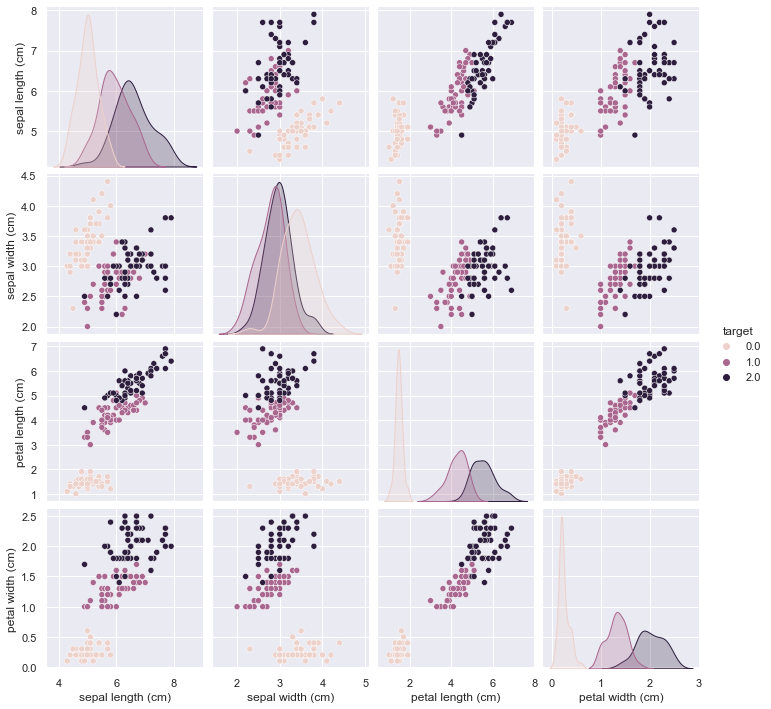

In [16]:
sns.pairplot(irisdf, vars=irisdf.columns[:-1], hue='target')

At the time of writing a version of this figure appears on the Wikipedia page for the Iris data set

<https://en.wikipedia.org/wiki/Iris_flower_data_set>

Image: <https://en.wikipedia.org/wiki/Iris_flower_data_set#/media/File:Iris_dataset_scatterplot.svg>

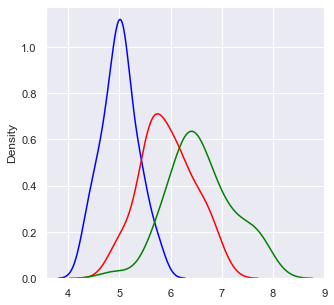

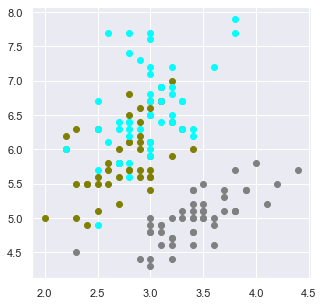

In [17]:
# To help make sure we understand what's going on here we could grab the data as numpy vectors
# and try to plot these, e.g. ....

sepal_lengths_target0 = irisdf.loc[irisdf['target'] == 0].iloc[:,0].to_numpy()
sepal_lengths_target1 = irisdf.loc[irisdf['target'] == 1].iloc[:,0].to_numpy()
sepal_lengths_target2 = irisdf.loc[irisdf['target'] == 2].iloc[:,0].to_numpy()

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)
# use the sns axes level function kdeplot - alternatively you could just try matplotlib hist
sns.kdeplot(sepal_lengths_target0, ax=ax1, color='blue')
sns.kdeplot(sepal_lengths_target1, ax=ax1, color='red')
sns.kdeplot(sepal_lengths_target2, ax=ax1, color='green')


sepal_widths_target0 = irisdf.loc[irisdf['target'] == 0].iloc[:,1].to_numpy()
sepal_widths_target1 = irisdf.loc[irisdf['target'] == 1].iloc[:,1].to_numpy()
sepal_widths_target2 = irisdf.loc[irisdf['target'] == 2].iloc[:,1].to_numpy()

fig = plt.figure(figsize=(5, 5))
ax2 = fig.add_subplot(111)
ax2.scatter(sepal_widths_target0, sepal_lengths_target0, color='grey')
ax2.scatter(sepal_widths_target1, sepal_lengths_target1, color='olive')
ax2.scatter(sepal_widths_target2, sepal_lengths_target2, color='cyan')

## Covariance and correlation coefficient

As we saw in the previous section, the variance of a dataset is computed as the average of the squared distances from the mean. 

We now extend this idea to two variables in a dataset, which leads us to the concepts of *covariance* and *correlation*.



### Covariance

The (population) [*covariance*](https://en.wikipedia.org/wiki/Covariance) between two variables in a dataset tells us if large values in one variable are associated with large values in the other and, conversely, if small values in one variable are associated with small values in the other. 

If we have two variables $x$ and $y$ in a dataset, we calculate the covariance as the average of products of differences from the mean for both variables:

$$
\mathrm{Cov}(x, y) = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}),
$$

with $\bar{x}$ and $\bar{y}$ being the means of the variables $x$ and $y$, respectively. 

Note that, unlike variance, which is always positive, covariance can be both positive or negative.

<br>

Let's think a bit about what's going on here:


- subtracting the means can be interpreted as shifting all the $x$ and and all the $y$ data to be distributed about zero.


- the covariance will then be LARGE in magnitude and POSITIVE when it is made up of a sum of large positive numbers (which we get through the product of two large positive values, OR through the product of two large in magnitude but negative values)


- conversely the covariance will be LARGE in magnitude and NEGATIVE when it is made up of a sum of large in magnitude negative numbers (which we get through the product of two large in magnitude values of differing signs)


- and finally the covariance will be SMALLER in magnitude when larger numbers are multiplied with smaller numbers, and will be zero or near zero when the resulting postives and negatives cancel each other out when summed.

<br>

The result is that a positive covariance means that the two variables vary in the same direction: larger values in one variable are associated with larger values in the other, and similarly smaller values in one variable are associated with smaller values in the other. 

On the other hand, a negative covariance means that larger values of one variable are associated with smaller values of the other, and vice-versa. 

Finally, a covariance close to 0 means that there is no linear relationship between the two variables.

<br>

Looking at the plots above (before looking at the numbers from the following cell, use the "eyeball norm" to estimate the covariances in terms of larger/smaller, positive/negative - do this for all the data, i.e. ignore the different colours.

<br>

Now let's actually calculate the covariances between the four measured variables in the Iris dataset using the Pandas pairwise covariance function:

In [18]:
# let's ignore the final column - the `target` or `class` variable
irisdf.iloc[:, :-1].cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


### Covariance matrix

By computing covariances on the Iris dataset, we obtained more than a single value - we obtained a matrix. 

We refer to that matrix as a [*covariance matrix*](https://en.wikipedia.org/wiki/Covariance_matrix). It helps us to visually structure the covariances between two or more variables in a dataset. With $n$ variables in a dataset, the covariance matrix is an $n \times n$ symmetric matrix, as illustrated in [Figure 1](#fig:covariance_matrix). 

<img src="images/ch03_covariance_matrix.png" id="fig:covariance_matrix" width="250" alt="Figure 1: The illustration of a covariance matrix of the variables x and y." />

**Figure 1**: The illustration of a $2 \times 2$ covariance matrix between the variables $x$ and $y$.

<br>


The diagonal is filled with the covariances of variables with themselves - $\mathrm{Cov}(x, x)$ which simply corresponds to the variance $\mathrm{Var}(x)$:

$$
\begin{aligned}
\text{Cov}(x, x) &= \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})(x_i - \bar{x}) \\
&= \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2 \\
&= \text{Var}(x)
\end{aligned}
$$

Non-diagonal elements correspond to covariances between different variable pairs, and since $\mathrm{Cov}(x, y) = \mathrm{Cov}(y, x)$ the covariance matrix is symmetric.

Since the Iris dataset has 4 columns (variables), the covariance matrix is a $4 \times 4$ matrix.

### Correlation coefficient

Note that the magnitude of the covariance value we get out of above is hard to interpret as it's impacted by the size of the data, in other words it is *not* non-dimensional.

We define the [*correlation coefficient*](https://en.wikipedia.org/wiki/Correlation_coefficient) $\rho_{x,y}$, also known as the [*Pearson product-moment correlation coefficient (PPMCC)*](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), as the covariance between two variables $\mathrm{Cov}(x, y)$ normalised by the product of their standard deviations:

$$
\rho_{x,y} = \frac{\mathrm{Cov}(x, y)}{\sigma(x)\sigma(y)}
$$

The correlation coefficient provides a measure of the *linear* correlation between the values from datasets $x$ and $y$.

$\rho_{x,y}$ has a range of -1 to 1, with values closer to zero indicating less correlation.
The closer it is to 1 or -1, the stronger the positive or negative correlation, respectively.

NB. Covariance and correlation only account for linear relationships. Two variables could be non-linearly related to each other and these metrics could come out as zero.

(-0.11756978413300204, 0.15189826071144918)
-0.11756978413300213


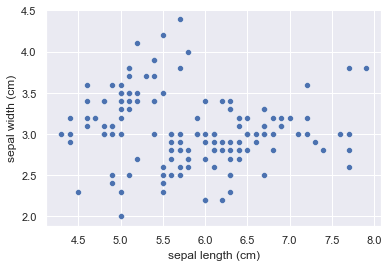

In [19]:
# Let's use st.pearsonr to compute this quantity for the first two columns of data
x = irisdf.iloc[:, 0]
y = irisdf.iloc[:, 1]
_ = sns.scatterplot(x=x, y=y)

# print out what st.pearsonr returns
print(st.pearsonr(x, y))

# and check it (the first value output) agrees with what we compute 
# based on the formula in the above cell:
print(irisdf.iloc[:, :-1].cov().iloc[0,1] / (st.tstd(x)*st.tstd(y)) ) 

# Note that the second value is the "p-value".
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html:
# "The p-value roughly indicates the probability of an uncorrelated 
# system producing datasets that have a Pearson correlation at least 
# as extreme as the one computed from these datasets."
# <https://en.wikipedia.org/wiki/P-value>

(0.8717537758865832, 1.0386674194497525e-47)


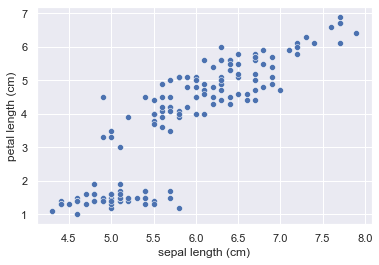

In [20]:
# The correlation was low and the p-value high when considering
# sepal length vs sepal width


# Instead consider what we get if we look at
# sepal length vs petal length:
x = irisdf.iloc[:, 0]
y = irisdf.iloc[:, 2]
_ = sns.scatterplot(x=x, y=y)
print(st.pearsonr(x, y))

# correlation now high with p-value very low

# Probability and Uncertainty

*Probability* provides a means to talk about and to measure [**uncertainty**](https://en.wikipedia.org/wiki/Uncertainty). 

We could think of it as the proportion of times a certain event occurs, or our degree of belief about an event occurring.

<br>

These two ways of thinking about probability map over to what are sometimes known as the [**Frequentist**](https://en.wikipedia.org/wiki/Frequentist_probability) and [**Bayesian**](https://en.wikipedia.org/wiki/Bayesian_probability) interpretations or methodologies. 

<br>

[Note that the definition or interpretation of Bayesian in terms of "belief" explains why is it sometimes described in terms of "subjective probability"]

Some interesting further reading about the distinctions between the Frequentist and Bayesian way of thinking, and the famous "Monty Hall" thought experiment:

<https://towardsdatascience.com/statistics-are-you-bayesian-or-frequentist-4943f953f21b>

<https://stats.stackexchange.com/questions/22/bayesian-and-frequentist-reasoning-in-plain-english>

<https://en.wikipedia.org/wiki/Monty_Hall_problem>

<https://towardsdatascience.com/the-monty-hall-problem-388f71a73e1>

<https://www.statisticshowto.com/probability-and-statistics/monty-hall-problem/>

<https://math.stackexchange.com/questions/2862752/how-to-solve-the-monty-hall-problem-using-bayes-theorem>

The **uncertainty** that we may want to consider can be of two types: 

<br>

- [**Aleatoric**](https://en.wikipedia.org/wiki/Uncertainty_quantification#Aleatoric_and_epistemic_uncertainty): The underlying phenomenon is inherently random and the uncertainty arises from it, i.e. more knowledge, data or a better model will not reduce the uncertainty. 
    - ***Aleatoric*** $\approx$ "***randomness***"

<br>

- [**Epistemic**](https://en.wikipedia.org/wiki/Uncertainty_quantification#Aleatoric_and_epistemic_uncertainty): The underlying phenomenon is deterministic but our model is imperfect due to limitations over things we could know perfectly in principle but do not know in practice, i.e. more knowledge, data or a better model would reduce the uncertainty. 
    - ***Epistemic*** $\approx$ "***lack of knowledge***"


<br>


Suggested further reading: 

- Tony O'Hagan, Dicing with the unknown. <https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1740-9713.2004.00050.x>


<br>
<br>
[NB. This also links back to earlier discussions on models, validation, sensitivity studies for input choices, calibration of uncertain inputs, etc.]

## Random variables

Unlike the *variables* we use elsewhere, e.g. in standard calculus, a [**random variable**](https://en.wikipedia.org/wiki/Random_variable) takes a value corresponding to the [**outcome(s)**](https://en.wikipedia.org/wiki/Outcome_(probability)) of a **random experiment**
(so building on above we might instead use the term *aleatory variable*,or stochastic variable).  [Think: values 0|1 correspond to outcomes Heads|Tails ... see below]

A random [variable](https://en.wikipedia.org/wiki/Variable_(mathematics)) can be considered a **function** that takes an outcome (from the set of all outcomes) as an input and returns a "value", e.g. a real number.  These values are sometimes termed *states* and the set of all of these states is termed the *target space*.

Since we don't know the outcome before performing the experiment we don't know this output value, hence it's "variable", i.e. not fixed, and since we assume the experiment is not deterministic, it's a "random" variable. However, mathematically we can just consider it a [function](https://en.wikipedia.org/wiki/Function_(mathematics)).

<br>

We can see an immediate example of such a *function* as we can readily execute Python code here:

In [21]:
# Execute this cell several times
print(np.random.rand())

0.1497245449176714


[Actually as this relies on an algorithm implemented in code, this function would be called a [*psuedo* random number](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) generator - see also <https://engineering.mit.edu/engage/ask-an-engineer/can-a-computer-generate-a-truly-random-number/>]

<br>

<br>

As a proper example, suppose we flip a coin, the two possible outcomes are "heads" (H) and "tails" (T). An example of a random variable would be a function that maps the outcome H to value 0 and the outcome T to value 1. 

As another example, let us say that we know that we are going to flip the coin 10 times. Then in this case we could also choose to define a random variable so that it maps the sequence of flips we get to the single number that counts the number of times we get heads.

If we were rolling three dice the random variable could map the outcome to the number of sixes, or it could be chosen to map to the sum of the three faces shown by the three dice.

### More definitions (for completeness and reference - you don't need to memorise)

Let us now define some other terms, some of which we already used:



- A **random experiment** describes a process that gives us uncertain results, e.g. a coin flip.



- The **outcome** of a random experiment is the result we obtain. If we flip a coin, two possible outcomes are H and T. Alternatively, if we pick a card from a deck of 52 cards, there are 52 possible outcomes. If we roll a six-sided die, the possible outcomes are 1, 2, 3, 4, 5, or 6. 



- The **sample space**, often denoted as $S$, is the set of all possible outcomes. For example, the sample space of a single six-sided die-rolling experiment is $\{1, 2, 3, 4, 5, 6\}$. The curly braces ($\{\}$) are used to denote [sets](https://en.wikipedia.org/wiki/Set_(mathematics)) (collections of elements). In an experiment where we flip a coin two times, the sample space is $\{\mathrm{HH}, \mathrm{HT}, \mathrm{TH}, \mathrm{TT}\}$. These are examples associated with a *discrete* random variable, we will also see *continuous* random variables where the sample space is infinite dimensional, i.e. there are infinitely many possible outcomes.



- An **event** is a set of outcomes, i.e. a subset of the sample space. An event has occurred when the outcome of the experiment is an element of the "event". Intuitively, it corresponds to a question we can ask about the outcome of a random experiment. For instance, if we roll a die, we can ask:
    - "Is the outcome a 6?"
    - "Is the outcome in the set $\{1, 3, 6\}$?"
    - "Is the outcome even, i.e. in the set $\{2, 4, 6\}$?"

Note that the single outcome "6" is an element of all three of these events. 

All individual "outcomes" (1, ..., 6) are also individual "events" (and termed [*elementary events*](https://en.wikipedia.org/wiki/Elementary_event)).

We can think of the set of all events as the [power set](https://en.wikipedia.org/wiki/Power_set) (i.e., the set of ALL subsets) of the set of outcomes.
<br>

We assign probabilities to *events* (which as just stated includes the individual outcomes).

A [**stochastic process**](https://en.wikipedia.org/wiki/Stochastic_process) is a general term for a process that consists of multiple random experiments, or a family of random variables, e.g. keep rolling a dice until you get a six.

Another classical example is a [random walk](https://en.wikipedia.org/wiki/Random_walk).

Here's some code borrowed from <https://www.codingem.com/random-walk-in-python/>

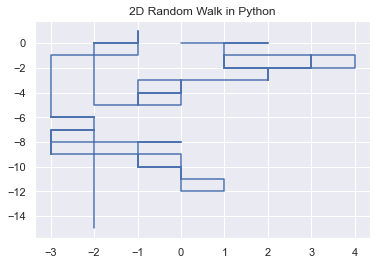

In [22]:
# run this cell several times - each time we start from (0,0)
# ... where do we end up and what route do we take?

import random

def randomwalk2D(n):
    # [0, 0, 0, ... ,0]
    x = np.zeros(n)
    y = np.zeros(n)

    directions = ["UP", "DOWN", "LEFT", "RIGHT"]
    for i in range(1, n):
        # Pick a direction at random
        step = random.choice(directions)
        
        # Move the object according to the direction
        if step == "RIGHT":
            x[i] = x[i - 1] + 1
            y[i] = y[i - 1]
        elif step == "LEFT":
            x[i] = x[i - 1] - 1
            y[i] = y[i - 1]
        elif step == "UP":
            x[i] = x[i - 1]
            y[i] = y[i - 1] + 1
        elif step == "DOWN":
            x[i] = x[i - 1]
            y[i] = y[i - 1] - 1
    
    # Return all the x and y positions of the object
    return x, y

x_data, y_data = randomwalk2D(100)

plt.title("2D Random Walk in Python")
plt.plot(x_data, y_data)
plt.show()

### Discrete and continuous random variables

A random variable is **discrete** when it maps an outcome to a finite set of values, e.g. outcome of a die or a coin toss. 

On the other hand, a random variable is **continuous** when it maps an outcome to any value in a range. For instance, the temperature could theoretically be $8.0^{\circ}C$, or $8.05^{\circ}C$, or $8.053^{\circ}C$. The possible set of values in this case is infinite. [But what if we can only measure with finite precision?]

## Probability

### Properties

The **probability** associated with an event (including the elementary events, i.e. the individual outcomes) tells us how likely it is to occur. 

Probabilities must satisfy the following rules:


1. They must be a non-negative real number.
    
    
2. They cannot exceed 1.
    
    
3. The probability that ANY of the possible outcomes will occur is 1 (that is, the sum of the probabilities over the individual outcomes (not all events) sums to 1).
    
    
4. For two "mutually exclusive" events, the probability that either of the events occurs is equal to the sum of the probabilities that each event occurs.
    
    
<br>
<br>

You might find this reference a useful resource:

Probability rules cheat sheet (Basic probability rules with examples): <https://medium.com/data-comet/probability-rules-cheat-sheet-e24b92a9017f>

<br>
<br>

Roughly speaking, a probability of 1 means that the event will always occur and a probability of 0 means that the event will never take place. 

(The former could be the event that we throw any of 1,2,3,4,5 or 6; while the latter is the null event, i.e. that something other than one of our outcomes occurs - we're clearly excluding the possibility that we lose the die, or that it lands on a corner or edge here!)


##### Aside - "almost ..."

However, in the case of *continuous* random variables, where the sample space (space of all possible outcomes) is infinite, a probability of 1 means that the event is "almost" certain to occur and a probability of 0 means that the event will "almost" never take place.  

For more on this see <https://en.wikipedia.org/wiki/Almost_surely>. This is the analogue or [*almost everywhere*](https://en.wikipedia.org/wiki/Almost_everywhere) in measure theory.

For a fun example take a look at the "Infinite_monkey_theorem": <https://en.wikipedia.org/wiki/Infinite_monkey_theorem>
>a monkey hitting keys at random on a keyboard for an infinite amount of time will "almost surely" type any given text, including the complete works of William Shakespeare.

### Notation

Now that we have defined the terms we will use, let us look at the notation. 

We typically denote random variables with uppercase letters, such as $X$. 

The probability distribution associated with the random variable $X$ is denoted as $P(X)$ (defined next).

The probability that this random variable takes the value $x$ is denoted as $P(X=x)$, or simply $P(x)$.

<br>

For example, in the case of a single coin toss we can write $P(0)=1/2$ [i.e. the probability that our random variable $X$ returns a zero, i.e. that our outcome of our experiment was a head, is a half.]

## Probability Distribution Function

A [**probability distribution function**](https://en.wikipedia.org/wiki/Probability_distribution) is a function mapping each outcome (or event) to its probability. 

More specifically, the probability mass for discrete variables, and the probability density for continuous variables. 

In the latter case we talk about the [**probability density function**](https://en.wikipedia.org/wiki/Probability_density_function) and often use the acronym **PDF**, while in the former we might talk about the [**probability mass function**](https://en.wikipedia.org/wiki/Probability_mass_function) (**PMF**).

<br>

Note that for discrete random variables we can obtain the probability of an event from the probability of individual outcomes, e.g. the probability of an even dice throw = sum of probabilities of rolling 2, 4 or 6. Hence it is sufficient for us to just define a function that assigns probabilities to outcomes.

However, for a continuous random variable the probability of any individual outcome is actually zero and so we might think instead of an interval of outcomes, i.e. a subset of the sample space = an event.

### Probability Mass Functions

Probability functions of *discrete* random variables are called [**probability mass functions** (or PMFs)](https://en.wikipedia.org/wiki/Probability_mass_function). 

For instance, let us say that we are performing a die-rolling experiment. We call $X$ the random variable corresponding to this experiment. Assuming that the die is fair, each outcome is *equiprobable*: if we run the experiment a large number of times, we will get each outcome approximately the same number of times. Here, assuming a six-sided die, there are six possible outcomes, so we have a  one over six chance of rolling each number.

Thus, the probability mass function describing $X$ returns $\frac{1}{6}$ for each possible outcome, and technically 0 otherwise since we cannot get something different than 1, 2, 3, 4, 5, or 6. 

<br>

We can thus write:

$$
P(X=x) \equiv P(x) = 
\begin{cases}
    \frac{1}{6},& \mathrm{if}\, x \in S=\{1, 2, 3, 4, 5, 6\} \\
    0,              & \text{otherwise}
\end{cases}
$$

<br>

Also common is the notation ("p sub x"):

$$p_X(x) = P(X=x)$$

where $p_X(x)$ is a function from $\mathbb{R}$ (the set of all real numbers) into the interval $[0,1]$, i.e. $p_X:\mathbb{R}\rightarrow [0,1]$.

We will plot such a function shortly.

### Properties of Probability Mass Functions

Not every function can be considered as a probability mass function. 

A probability mass function must satisfy the following two conditions:

<br>

1. The function must return values between 0 and 1 for each possible outcome: $0 \leq P(x) \leq 1$ (or as above $p_X:\mathbb{R}\rightarrow [0,1]$).

<br>

2. The sum of probabilities corresponding to all the possible outcomes must be equal to 1:


$$
\sum_{x \in S} P(x) = 1  \qquad\text{or}\qquad \sum_{x \in S} p_X(x) = 1
$$

<br>


The value of $x$ can be any real number because values outside of the sample space are associated with a probability of 0, i.e. mathematically for any value $x$ not in the sample space $S$, $P(x)=0$.

Hence, we can also legitimately write

$$
\sum_{x \in \mathbb{R}} P(x) = 1  \qquad\text{or}\qquad \sum_{x \in \mathbb{R}} p_X(x) = 1
$$

### Simulation of a die-rolling experiment

Let's simulate a die-rolling random experiment using the NumPy function `np.random.randint(low, high, size)`, which draws $n$ (`size`) random integers between `low` and `high` (high excluded) from a [*discrete uniform distribution*](https://en.wikipedia.org/wiki/Discrete_uniform_distribution) (i.e. each value equally likely to occur). 

We begin by simulating 20 die rolls, and printing the 20 outcomes we obtain:

In [23]:
#run several times, with and witout setting a random seed

def dice_experiment(n):
    # Set the seed if you want to make the random experiment reproducible.
    # If you exclude this you should get a different result each time you run.
    np.random.seed(1)
    # return n rolls from the S = {1, 2, 3, 4, 5, 6} sample space
    return np.random.randint(low=1, high=7, size=n)

n = 20  # number of die rolls
outcomes = dice_experiment(n)
print(outcomes)

[6 4 5 1 2 4 6 1 1 2 5 6 5 2 3 5 6 3 5 4]


This array contains 20 outcomes of the random experiment. 

Define $X$ to be the discrete random variable corresponding to the die rolling experiment. The probability mass function of $X$ is defined only for the possible outcomes and gives us the probability for each of them.

Let's visualise how many times each outcome occurred in the random experiment. 

By dividing the number of occurrences of each outcome (which we obtain using [`numpy.unique`](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) with the "return_counts" option) by the total number of rolls $n$ we get the probabilities. Assuming the die is fair, we *expect* to obtain a *uniform distribution* - i.e. we expect each of the six outcomes to have the probability 1/6.

We will use a stem plot [`plt.stem()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stem.html) from Matplotlib to visualise these probabilities:

In [24]:
# just define some useful functions first
def probabilities(outcomes):
    # Extract the number of occurences for each outcome
    values, counts = np.unique(outcomes, return_counts=True)
    n = len(outcomes)  # total number of outcomes   
    return values, counts/n

def plot_probability_mass_function(values, probabilities):
    # Plot the probability mass function
    plt.stem(values, probabilities, use_line_collection=True)

    # Axis labels
    plt.xlabel(r'$x$')
    plt.ylabel(r'$P(x)$')

    # Ensure that ticks are displayed with the right step
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))

    plt.show()

In [25]:
# this is what the output of our function looks like for the 20 tosses
# we performed above
print(probabilities(outcomes))

(array([1, 2, 3, 4, 5, 6]), array([0.15, 0.15, 0.1 , 0.15, 0.25, 0.2 ]))


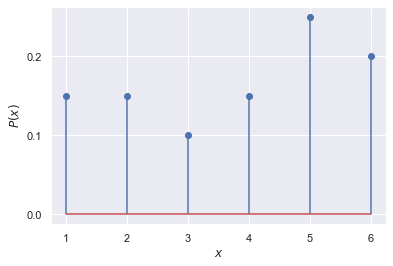

In [26]:
# visualise what our (calculation/approximation of the true) 
# PMF looks like in this case
plot_probability_mass_function(*probabilities(outcomes))

# if you rerun the experiment without setting the random seed you will see variations in this

Let's check that our probability mass function satisfies the condition:

$$
\sum_{x \in S} P(x) = 1
$$

In [27]:
print(sum(probabilities(outcomes)[1]))

1.0


With a uniform distribution (fair die), the plot would/should have the same height for each outcome (since the height corresponds to the probability, which is the same for each outcome of a die throw). 

However, the distribution shown in the above figure doesn’t look uniform. 

That is because we did not repeat the experiment enough times: the probabilities will equalise as we repeat the experiment a large number of times. 

Let's repeat the experiment for 1,000,000 die rolls:

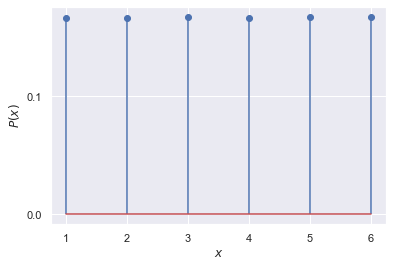

In [28]:
n = 1_000_000
outcomes = dice_experiment(n)
plot_probability_mass_function(*probabilities(outcomes))

We can see that the probability mass function we have computed now far better resembles a uniform distribution.

Let's print the probabilities to see how equal they actually are [more on this in the homework]:

In [29]:
print(probabilities(outcomes))

(array([1, 2, 3, 4, 5, 6]), array([0.166288, 0.166316, 0.166637, 0.166555, 0.167247, 0.166957]))


### Probability Density Functions

With continuous variables, there are an infinite number of possible outcomes. 

For instance, say we were somehow drawing a number between 0 and 1 - you might get an outcome of, for example, 0.4139498340 (where every digit after the zero is also zero and so we don't type them out, OR there are non-zeros that follow that we don't type as we need to truncate at some point - think pi for example)


In [30]:
# mpmath is a free (BSD licensed) Python library for real and complex floating-point arithmetic 
# with arbitrary precision.
from mpmath import mp
mp.dps = 1000  # number of decimal places to use
print(mp.pi)

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642019

    *Question*: What is the probability of getting one particular outcome with a continuous variable?  

    *Answer*: Zero!

<br>

And that's the case whether or not we can write the outcome down in finite digits or not (i.e. for pi as well as for 1.0).


<br>

Hence, we prefer to calculate the probability of getting an outcome within a *range* of values.

The $y$-axis of a probability function in the case of continuous random variables is therefore NOT actually a probability. 

Rather it is called a **probability density** or just *density*. Thus, probability distributions for continuous variables are called [**probability density functions**](https://en.wikipedia.org/wiki/Probability_density_function) (or PDF). 

We will denote probability density functions using a lowercase $p$. For instance, the function $p(x)$ gives us the probability *density* corresponding to the value $x$.

It is the integral of the probability density function over a particular interval that gives us the probability that a random variable takes a value in this interval. This probability is thus given by the area under the curve in this interval.

So note that the probability of a single value for $x$, i.e. single outcome, can be interpreted as the integral over a zero width interval (area under curve $\approx$ zero width multiplied by a *finite* height), which would be zero.

<br>

##### Aside

Contrast this with the Dirac-delta function (its "height" and the properties of its integral).

### Example 1

Let's look at an example of probability density function. 

We can randomly draw data points from a [*normal distribution*](https://en.wikipedia.org/wiki/Normal_distribution) using the NumPy function [`np.random.normal(loc, scale, size)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html), where `loc` is the mean $\mu$, `scale` is the standard deviation $\sigma$, and `size` is the number of data points.

Let's use this to create 10,000 data points drawn randomly from a normal distribution that has a mean of 0 and a standard deviation of 0.1, and plot the values using a histogram (with `bins` controlling how many rectangles/intervals we use). 

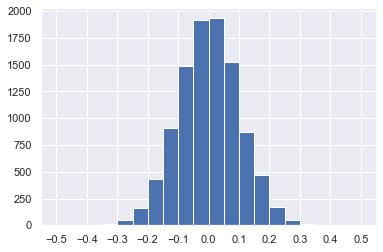

In [31]:
# set the seed to make the random experiment reproducible
np.random.seed(1)

mean = 0
standard_deviation = 0.1
n = 10_000

# Draw outcomes from a normal distribution
outcomes = np.random.normal(loc=mean, scale=standard_deviation, size=n)

# Plot histogram
hist = plt.hist(outcomes, bins=20, range=(-0.5, 0.5))

# Set the ticks step size
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))

plt.show()

Note the classic "bell curve" *trying* to emerge. 

Try changing the `bins` parameter, the number of samples `n`, the mean, and the standard deviation in the example to see how it changes the bell.

<br>
<br>

We can also use the kdeplot function to plot an approximation to the distribution for this data.

>Kernel density estimation <https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde>
A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:

<AxesSubplot:ylabel='Density'>

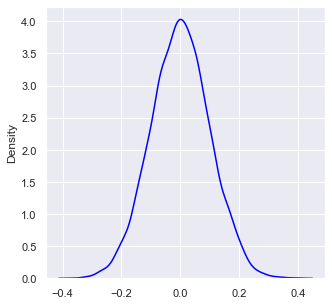

In [32]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)
# use the sns axes level function kdeplot - alternatively you could just try matplotlib hist
sns.kdeplot(outcomes, ax=ax1, color='blue')

The above (experiment and corresponding histogram), while being a good approximation, is still a discretised version of what is a continuous phenomenon underneath. Let us take this to the limit and try to plot the normal (or Gaussian) probability density function. 

The explicit form of the Gaussian probability density function is: 

$$p(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\frac{(x - \mu)^2}{\sigma^2}}$$

where $\mu$ is the mean and $\sigma$ is the standard deviation. 

We will use its implementation from the normal continuous random variable [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).

Text(0, 0.5, '$p(x)$')

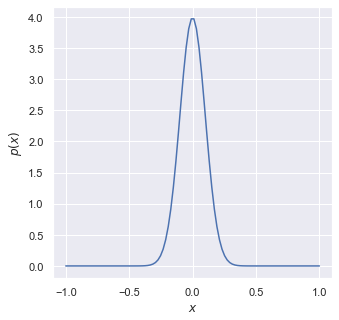

In [33]:
mean = 0
standard_deviation = 0.1

# Define the normal distribution
normal_distribution = st.norm(mean, standard_deviation)

# Compute PDF values at a sequence of x locations between -1 and 1
x_values = np.linspace(-1, 1, 100)
# normal_distribution.pdf is a function that can act on these x values 
y_values = normal_distribution.pdf(x_values)

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)
# Plot PDF
ax1.plot(x_values, y_values)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$p(x)$')

### Cumulative distribution function

Once we have the PDF, we can compute the [**cumulative distribition (or density) function**](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF) for a random variable, which for a given $x$ value returns the probability that $X$ is less than or equal to $x$:

$$P(X\leq x)$$

[Also, see a homework exercise that asks you to compute and plot the CFD yourself.]

Note that as we're now considering an interval, the $y$ axis of a plot of this *does* correspond to a probability.

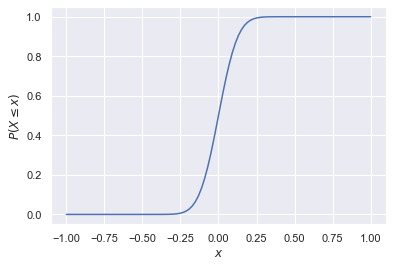

In [34]:
mean = 0
standard_deviation = 0.1

# Define the normal distribution
normal_distribution = st.norm(mean, standard_deviation)

# Compute CDF values at a sequence of x locations between -1 and 1
x_values = np.linspace(-1, 1, 100)
y_values = normal_distribution.cdf(x_values)

# Plot PDF
plt.plot(x_values, y_values)
plt.xlabel(r'$x$')
plt.ylabel(r'$P(X\leq x)$')
plt.show()

Visually - how can you argue that the integral under this curve is one? 

### Example 2

Let's go back to the Iris dataset. 

We know that the data comes from the three species of the Iris flowers. 

Let's plot the sepal length (first column) for Iris Setosa (`target=0`) and calculate the mean and standard deviation of each feature in each species. 

In [35]:
# DataFrame for Iris setosa
iris_setosa_df = irisdf.loc[irisdf['target'] == 0]
iris_setosa_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


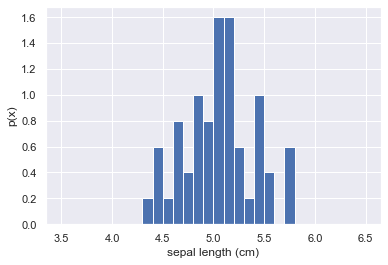

In [36]:
# Extract the sepal length as a numpy array.
data = iris_setosa_df['sepal length (cm)'].to_numpy()

# Plot the sepal length histogram
plt.hist(data, range=(3.5, 6.5), bins=30, density=True)

# Label axes
plt.xlabel('sepal length (cm)')
plt.ylabel('p(x)')

plt.show()

It looks like a normal distribution might represent a reasonable model of this distribution - we only have 50 samples to go by.

To plot the normal distribution for sepal length, we need the mean and the standard deviation:

In [37]:
# Here are all of the means
irisdf.groupby(['target']).mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0.0,5.006,3.428,1.462,0.246
1.0,5.936,2.770,4.260,1.326
2.0,6.588,2.974,5.552,2.026


In [38]:
# and all of the standard deviations
irisdf.groupby(['target']).std()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0.0,0.352490,0.379064,0.173664,0.105386
1.0,0.516171,0.313798,0.469911,0.197753
2.0,0.635880,0.322497,0.551895,0.274650


Now that we have computed the mean and the standard deviation, we can use them to *estimate* the normal distribution of these measurements. 

For example, for target $0$ (Iris Setosa), the sepal length has a mean of $5.006 \,\text{cm}$ and standard deviation of $0.352490\,\text{cm}$. 

Here is the plot of the *estimated distribution* that describes sepal length for Iris Setosa, plotted on top of the histogram of the actual data.

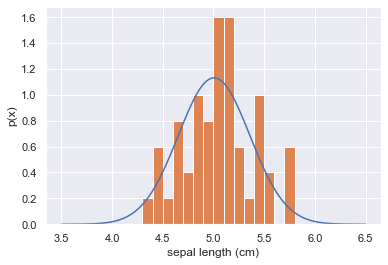

In [39]:
mean = 5.006  # cm
standard_deviation = 0.352490  # cm
normal_distribution = st.norm(mean, standard_deviation)

# Compute PDF values
x_values = np.linspace(3.5, 6.5, 100)
y_values = normal_distribution.pdf(x_values)

# Plot
plt.plot(x_values, y_values)  # normal distribution
plt.hist(data, range=(3.5, 6.5), bins=30, density=True)  # iris setosa sepal length

# Label axes
plt.xlabel('sepal length (cm)')
plt.ylabel(r'p(x)')

plt.show()

Based upon this normal distribution, what is the probability that $x = 5.1\,\text{cm}$ is the measured and reported sepal length of an Iris Setosa? 

We can answer that question using the cumulative distribution function (CDF) and the fact that we note the measurements in the Iris dataset are at an accuracy that measures/rounds/stores only values to the closest 0.1 cm. 

This means that instead of asking for the value $P(X=5.1)$ we should compute the probability of a value within an appropriate interval, e.g.

$$P(5.1 - 0.05 \lt X\leq 5.1 + 0.05)$$

this gives us the probability that the sepal length lies in the interval of size 0.1 centred at the target value of $x = 5.1\,\text{cm}$.

We can calculate this value from the cumulative distribution function:

$$P(5.1 - 0.05 \lt X\leq 5.1 + 0.05) = P(X\leq 5.1 + 0.05) - P(X\leq 5.1 - 0.05)$$

In [40]:
# Since the smallest measurement in the dataset is 0.1 cm,
# we use the range (x-eps) - (x+eps) (with eps=0.05) to calculate the probability.
def calc_probability(x, distribution, eps=0.05):
    # use the cdf = cumulative density function
    return distribution.cdf(x+eps) - distribution.cdf(x-eps)

x = 5.1
probability = calc_probability(x, normal_distribution)

print(f'The probability of sepal length being {x} cm for iris setosa is {probability}.')

The probability of sepal length being 5.1 cm for iris setosa is 0.10888540054111928.


This is the integral under the blue curve above, over an interval of width 0.1 where we can observe the height of the curve at location 5.1 is around 1.1 (base $\times$ height $\approx$ 0.1) and so we see that the value we've calculated here looks correct.

## Central Limit Theorem

The [**central limit theorem**](https://en.wikipedia.org/wiki/Central_limit_theorem) states that, if we consider $n$ independent random variables drawn from a(ny) distribution (not necessarily normal) with large enough $n$ and AVERAGE OR SUM their outcomes, the distribution of the results will be approximated by a Gaussian (normal) distribution. 

<br>

Why is this important? From <https://en.wikipedia.org/wiki/Central_limit_theorem>:

    "The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions."
    
    "Since real-world quantities are often the balanced sum of many unobserved random events, the central limit theorem also provides a partial explanation for the prevalence of the normal probability distribution."


<br>

Let's see this in action.

We have seen that the outcome of a single die follows the uniform distribution, i.e. all six outcomes are equally likely. That is, as we approximated above, if we throw one die multiple times our results converge to a uniform distribution as long as we throw the die enough times (100,000 is the default below; plot repeated next). 

<br>

But let's also build a function that can simulate throwing a number $n$ (`n_dice`) of dice, and sum (or average) their results, and then perform this experiment `n_trials` (100,000) times. 

<br>

The CLT tells us that the PDF of this sum (or average) should look like a normal rather than uniform distribution, assuming that $n$ (`n_dice`) is large enough

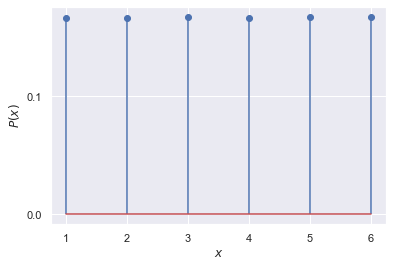

In [41]:
# throw one die 1M times

def dice_experiment(n):
    # Set the seed if you want to make the random experiment reproducible.
    # If you exclude this you should get a different result each time you run.
    np.random.seed(1)
    # return n rolls from the S = {1, 2, 3, 4, 5, 6} sample space
    return np.random.randint(low=1, high=7, size=n)


n = 1_000_000
outcomes = dice_experiment(n)
plot_probability_mass_function(*probabilities(outcomes))

In [42]:
# now use randint to simulate throwing n_dice at once, sum the result
# and record this sum n_trials times
def sum_distribution_dice(n_dice, n_trials=100_000):
    trials = np.zeros(n_trials)
    for i in range(n_trials):
        trials[i] = np.random.randint(low=1, high=7, size=n_dice).sum()

    return trials

Now, we’ll use this function to evaluate the distribution of the sums for 1, 2, and 30 dice:

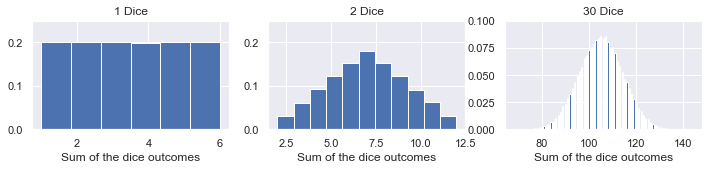

In [43]:
np.random.seed(1)

random_var_dice_1 = sum_distribution_dice(1)
random_var_dice_2 = sum_distribution_dice(2)
random_var_dice_30 = sum_distribution_dice(30)

_, axes = plt.subplots(1, 3, figsize=(12, 2))
ax0, ax1, ax2 = axes

ax0.hist(random_var_dice_1, bins=6, density=True) 
ax1.hist(random_var_dice_2, bins=11, density=True) 
ax2.hist(random_var_dice_30, bins=151, density=True) 

# Labels, limits, titles
ax0.set_ylim(0, 0.25)
ax0.set_title('1 Dice')
ax0.set_xlabel('Sum of the dice outcomes')

ax1.set_ylim(0, 0.25)
ax1.set_title('2 Dice')
ax1.set_xlabel('Sum of the dice outcomes')

ax2.set_ylim(0, 0.1)
ax2.set_title('30 Dice')
ax2.set_xlabel('Sum of the dice outcomes')

plt.show()

We observe that a uniform distribution (we see with one die on the left) evolves to a normal distribution as the number of dice increases (here we used 30 but you see similar results for 20 or less; note that a sample size of 30 is considered a mimimum for the CLT to hold in general).

With one die we've already established that each of the six outcomes has an equal probability of 1/6.

With two dice we can get any outcome for their sum from 2 to 12. 

To get 2 or 12 we need both dice to show 1 or both to show 6. Of the 36 possible combinations we can get each of these only once, and hence we expect their probability to be 1/36.

7 is the most common as we can get it through the largest number of combinations: $1+6$, $2+5$, $3+4$, $4+3$, $5+2$, $6+1$ - there are six of these and hence we expect its probability to be 6/36.

Let's check the result above is consistent with our expectation:

In [44]:
# use Counter to add up how many times we obtain each total
from collections import Counter
# https://docs.python.org/3/library/collections.html#collections.Counter
# https://pymotw.com/2/collections/counter.html

res = Counter(random_var_dice_2)
print(res,'\n')

for dsum in range(2,13):
    # print out 36 times the probability computed based on the ratio,
    # this should approach 1,2,3,4,5,6,5,4,3,2,1 for large sample sizes
    print(dsum, res[dsum]/len(random_var_dice_2), 36*res[dsum]/len(random_var_dice_2))

Counter({7.0: 16399, 8.0: 13956, 6.0: 13853, 9.0: 11216, 5.0: 11070, 4.0: 8474, 10.0: 8270, 11.0: 5704, 3.0: 5439, 12.0: 2833, 2.0: 2786}) 

2 0.02786 1.00296
3 0.05439 1.95804
4 0.08474 3.05064
5 0.1107 3.9852
6 0.13853 4.98708
7 0.16399 5.90364
8 0.13956 5.02416
9 0.11216 4.03776
10 0.0827 2.9772
11 0.05704 2.05344
12 0.02833 1.01988


And indeed the third column does start to approximate what we expect: 1,2,3,4,5,6,5,4,3,2,1.

For further examples see 

- <https://en.wikipedia.org/wiki/Illustration_of_the_central_limit_theorem>

- <https://medium.com/analytics-vidhya/central-limit-theorem-and-machine-learning-part-1-af3b65dc9d32>

- <https://towardsdatascience.com/central-limit-theorem-in-action-1d4832599b7f>

- <https://machinelearningmastery.com/a-gentle-introduction-to-the-central-limit-theorem-for-machine-learning/>

    From the latter: "The Central Limit Theorem, or CLT for short, is an important finding and pillar in the fields of statistics and probability. ... It may seem a little esoteric at first, so hang in there. It turns out that the finding is critically important for making inferences in applied machine learning."

## Joint Probability

The [**joint probability**](https://en.wikipedia.org/wiki/Joint_probability_distribution) is the probability that two or more events occur.

### Notation

The **joint probability** that the random variable $X$ takes the value $x$ and that the random variable $Y$ takes the value $y$ can be written as:

$$
P(X=x, Y=y)
$$

To continue we must consider the dependence between the events we are considering.


### Dependent and Independent Events

**Dependent events** are events that are related in the sense that the probability of one depends on the result of the other event. 

For instance, if you randomly pick two coloured balls from a bag without replacement, the probabilities associated with the second pick will depend on the outcome of the first pick.

[Figure 4](#fig:dependent_events) illustrates the following example: there are 4 red balls and 2 blue balls in the bag. 

The probability of choosing a red ball is $\frac{4}{6}$ and a blue ball is $\frac{2}{6}$. 

If you pick a red ball the first time, the probability of picking another red ball in the second draw is now $\frac{3}{5}$; that of picking a blue ball is now $\frac{2}{5}$ (as illustrated in the bottom right). 

However, if you get a blue ball at the first draw, the probability of picking a red ball on the second draw is then $\frac{4}{5}$ and $\frac{1}{5}$
to pick another blue ball (top right). 

So the first draw clearly has an influence on the probability distribution of the second.

<img src="images/ch03_dependent_events.png" id="fig:dependent_events" width="200" alt="Figure: Examples of dependent events with a draw without replacement." />

**Figure 4**: An illustration of dependent events.

<br>

By contrast, **independent events** are events that do not interfere with each other. For instance, if you roll two dice, you do not expect that the outcome of one will affect the outcome of the other.

In the ball picking example, if we did replace the first ball (i.e. put it back in the bag after the first pick), then the second pick is now an independent events.

### Joint Probability of Independent and Dependent Events

#### Independent Events

If two random variables $X$ and $Y$ are independent, their joint probability is equal to the product of the probability of each event.

Mathematically, you can write:

$$ P(X=x, Y=y) = P(X=x) P(Y=y) $$

**Example**: If you throw a die and toss a coin, what is the probability to get a 6 and "heads"?

<br>

To answer this question, you need to consider both events. The joint probability is calculated by multiplying the probability of each event together:

$$
P(X=6, Y=\text{"heads"}) = \frac{1}{6} \times \frac{1}{2} = \frac{1}{12}
$$

Note that $P(Y=\text{"heads"})$ is a shortcut because random variables maps outcomes to real values: it means that the experiment associated with the random variable $Y$ has the outcome "heads".


#### Dependent Events

For dependent events, we need to use rules from conditional probabilities (discussed later) to calculate their joint probability.

### Marginal Probabilities and the Sum Rule

Marginal probabilities is the name given to probabilities that are *not* joint probabilities, i.e. probabilities of single events - the way we have considered them so far. 

Marginal probabilities can be obtained from joint probabilities by *marginalising* the other variables using the **sum rule of probability**: we just add all of the joint probabilities. This is the probability of the event we are interested in, irrespective of the outcomes of the other variables.

<br>

Mathematically, it is defined as follows:

$$
P(X=x) = \sum_{y} P(X=x, Y=y)
$$

The summation in the above equation is valid for the case of *discrete* random variables. For *continuous* random variables, this would be replaced by an integral over the other variables. The marginal probability $P(X=x)$ is the probability that $X=x$ without considering the other variables. 

<br>

Let's consider again the case of a combined die throw ($X$) and coin flip ($Y$) experiment. 
For instance, the marginal probability of $X=6$ is the sum of the following joint probabilities: $P(X=6, Y=\text{"heads"})$ and $P(X=6, Y=\text{"tails"})$. 

It is thus:

$$
\sum_y P(X=6, Y=y) = P(X=6, Y=\text{"heads"}) + P(X=6, Y=\text{"tails"}) = \frac{1}{12} + \frac{1}{12} = \frac{1}{6}
$$

<br>

For further reading, see also <https://machinelearningmastery.com/joint-marginal-and-conditional-probability-for-machine-learning/>

### The Iris dataset revisited

Let's return to the Iris dataset.

In [45]:
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


The first row of data is `[5.1, 3.5, 1.4, 0.2]`. (Recall this is the first data point out of 150 in total).

Let's **assume** that each of these four measurements are **independent**.

Can we use the normal probability distributions we computed for the Iris dataset above to estimate the probability that this row comes from the estimated distributions?

<br>

**Note**: This is not exactly the same question as asking "What is the probability that these measurements belong to an Iris flower of a particular species?". 

We will be able to formulate this second question only after we have learned Bayes theorem. 

<br>

For now due to our assumption of independence we can use the fact that the joint probability is equal to the product of the probability of each event:

In [46]:
# Calculate the means and standard deviations for our 
# four (4) features and our three (3) species
means = irisdf.groupby('target').mean().to_numpy()
stds = irisdf.groupby('target').std().to_numpy()

print('means: ',means)
print('stds: ',stds)

# Define the normal distributions for each feature and species
distributions = []
for mvec, sdvec in zip(means, stds):
    distributions.append([st.norm(m, sd) for m, sd in zip(mvec, sdvec)])

# Since the smallest measurement in the dataset is 0.1 cm,
# we use the range (x-eps) - (x+eps) (with eps=0.05) to calculate the probability.
def calc_probability(x, distribution, eps=0.05):
    # use the cdf = cumulative density function
    return distribution.cdf(x+eps) - distribution.cdf(x-eps)

def cls_probablility(data, cls, distributions):
    # initialise p - as we're going to be multiplying probabilities, initialise it to 1
    p = 1
    # for every feature, calculate its probability and multiply the results together
    for feat in range(4):
        p *= calc_probability(data[feat], distributions[cls][feat])    
    return p

# Consider our first data point
data = [5.1, 3.5, 1.4, 0.2]

for cls in range(3):
    # calculate the probability for each class/target species
    p = cls_probablility(data, cls, distributions)
    print('Probability of {} being from the estimated distribution of iris {} = {}'.format 
          (str(data),iris['target_names'][cls],p))

means:  [[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
stds:  [[0.35248969 0.37906437 0.173664   0.10538559]
 [0.51617115 0.31379832 0.46991098 0.19775268]
 [0.63587959 0.32249664 0.5518947  0.27465006]]
Probability of [5.1, 3.5, 1.4, 0.2] being from the estimated distribution of iris setosa = 0.0007982648713139496
Probability of [5.1, 3.5, 1.4, 0.2] being from the estimated distribution of iris versicolor = 3.7217595375229145e-21
Probability of [5.1, 3.5, 1.4, 0.2] being from the estimated distribution of iris virginica = 2.4644816812619693e-28


We're multiplying (in this case four) small numbers together to get this final results, which leads to extremely small values. But one joint probability is clearly far larger than the others.

More on classification for this dataset in the homework exercises.

## Conditional Probability

In some cases, we want to calculate the probability that an event will occur knowing that another event has already occurred. 

For instance, we can ask what is the probability of drawing a pair of kings in a deck of playing cards. We need to calculate the probability of getting a king in the first draw, and then the probability to drawing a second king. We want to know the probability of the second draw *under the condition* that we got a king in the first draw.

This is called [**conditional probability**](https://en.wikipedia.org/wiki/Conditional_probability): the probability of an event given that another event has occurred. 

We refer to conditional probability using the vertical bar (“\|”):

$$
P(Y=y \, | \, X=x)
$$

The conditional probability $P(Y=y \, | \,  X=x)$ is the probability that the random variable $Y$ equals $y$ *given that* the random variable $X$ equals $x$. 

Note that this notation differs from $P(Y=y, X=x)$, which is the joint probability that both $X=x$ and $Y=y$.

### Car example

Samantha’s car sometimes shows a warning light when there is a problem, but it is defective: sometimes the warning light comes on even when there is no problem, and sometimes the light is off but the car needs repair.

Let us call $P(\text{"warning light"})$ the probability of the event "the warning light is on", and $P(\text{"needs repair"})$ the probability of the event "the car needs repair".

[Figure 5](#fig:conditional_proba) illustrates the probabilities that the car needs repair (in blue) and the probability that the warning light is on (in red). The figure shows the data for five observations (the five columns from ‘Obs. 1’ to ‘Obs. 5’). For each of them, Samantha investigated the status of the car (needs repair or not) and noted the warning light (on or off). A blue square indicates that the car needed repair and a red square that the warning light was on. For instance, in the first observation, the car needed repair but the warning light was off (no red square).

<img src="images/ch03_conditional_proba.png" id="fig:conditional_proba" width="400" alt="Figure 5: The probability that the car needs repair is illustrated in blue and the probability that the warning light is on is illustrated in red, for five observations." />

**Figure 5**: The probability that the car needs repair is illustrated in blue and the probability that the warning light is on is illustrated in red, for five observations.

<br>

Based on our five observations we can see that $P(\text{"needs repair"}) = \frac{4}{5}$ because there are four observations where the car needed repair out of a total of five observations. Similarly, $P(\text{"warning light"})=\frac{2}{5}$ because there are two observations where the warning light was on. There is also a single observation with a blue and a red square: the car needed repair and the warning light was on, so $P(\text{"needs repair"}, \text{"warning light"})=\frac{1}{5}$.

<br>

Let's examine the conditional probabilities for this example. The statement $P(\text{"needs repair"} | \text{"warning light"})$ is the probability that the car needed repair given that the warning light was on. We can think of this probability as follows: we take only the observations where the warning light was on (‘Obs. 4’ and ‘Obs. 5’), and
then we look at the proportion of observations where car needed repair. These conditions are met in one observation out of the two so $P(\text{"needs repair"} \, | \, \text{"warning light"}) = \frac{1}{2}$.

The same idea can be used to find $P(\text{"warning light"} \, | \, \text{"needs repair"})$. We take the observations where the car needed repair and consider the number of times the warning light was on. We can see that this is one observation out of four, i.e. $\frac{1}{4}$.

The link between *conditional* and *joint* probability is formalised in the next section.

### The product rule of probability

For discrete random variables, the probability that $X=x$ *and* $Y=y$ (joint probability) equals the probability that $Y=y$ given that $X=x$ (conditional probability) multiplied by the probability that $X=x$.

Mathematically that is:

$$
P(X=x, Y=y) = P(Y=y \, | \, X=x) P(X=x)
$$

This is the *product rule of probability*, also called the *chain rule of probability*. Equivalently, under the assumption that $P(X=x) \ne 0$,  we can write:

$$
P(Y=y \, | \, X=x) = \frac{P(X=x, Y=y)}{P(X=x)}
$$

### Car example - revisited

Let's try to understand the logic behind these two formulations of the product rule using the previous faulty example.

First, the joint probability
$P(\text{"needs repair"}, \text{"warning light"})$ satisfies:

$$
P(\text{"needs repair"}, \text{"warning light"}) = P(\text{"warning light"} \, | \, \text{"needs repair"}) P(\text{"needs repair"})
$$

<br>

Since $P(\text{"needs repair"})$ is less than or equal to 1, the probability that the car needs repair and the warning light is on (i.e. $P(\text{"needs repair"}, \text{"warning light"})$) will be smaller or equal to  $P(\text{"warning light"} \, | \,  \text{"needs repair"})$. 

To consider all observations, we need to multiply by the proportion of observations where the car needs repair (i.e. $P(\text{"needs repair"})$).

<br>

Using the probabilities we calculated above, this is

$$
\frac{1}{5} = \frac{1}{4} \times \frac{4}{5}
$$


<br>

<br>


Let's see the second statement with the same example:

$$
P(\text{"warning light"} \, | \,  \text{"needs repair"}) = \frac{P(\text{"needs repair"}, \text{"warning light"})}{P(\text{"needs repair"}) }
$$

Similarly, to go from all observations to only the observations where the car needs repair, we need this time to divide by $P(\text{"needs repair"})$.

### More events

We can generalise the product rule to more events. For instance, with three events $A$, $B$ and $C$, we would have:

$$
P(A, B, C) = P(A | B, C) P(B, C)
$$

This means that the probability that the events $A$, $B$ and $C$ occurred is equal to the probability that $A$ occurred given that $B$ and $C$ occurred multiplied by the probability that $B$ and $C$
occurred.

<br>

Note that we can chain these probability products. Since the product rule says that:

$$
P(B, C) = P(B | C) P(C)
$$

We get:

$$
P(A, B, C) = P(A | B, C)  P(B | C) P(C)
$$


# Machine Learning, Data Science - "simple" methods and links to probability

<br>

*[Your next two modules go through ML in significant detail, so here we just touch on a few topics to link to the fundamonetals of propbability (and regression from the previous lecture).]*

<br>

Let's start with a quote:

>"*A computer program is said to learn from experience E with respect to some task T and some performance measure P if its performance on T, as measured by P, improves with experience E.*" - (Toni Mitchell, 1997)

Further background reading:

- <https://towardsdatascience.com/what-is-machine-learning-and-types-of-machine-learning-andrews-machine-learning-part-1-9cd9755bc647>

- <https://machinelearningmastery.com/what-is-machine-learning/>


<br>

and a figure taken from <http://drewconway.com/zia/2013/3/26/the-data-science-venn-diagram> which has an interesting discussion, including: 

- the "danger zone" is where they place people who "know enough to be dangerous" - people who don't have an appreciation of the underling math/stats. They also say " Fortunately, it requires near willful ignorance to acquire hacking skills and substantive expertise without also learning some math and statistics along the way. As such, the danger zone is sparsely populated, however, it does not take many to produce a lot of damage."  Consider these statements if you're asking the question why are we made to do this "computational math" module! 

and



- "To me, data plus math and statistics only gets you machine learning, which is great if that is what you are interested in, but not if you are doing data science. Science is about discovery and building knowledge, which requires some motivating questions about the world and hypotheses that can be brought to data and tested with statistical methods..."

<br>
<img src="./images/Data_Science_VD.png" width=300x>

*(Figure: <http://drewconway.com/zia/2013/3/26/the-data-science-venn-diagram>)*

<br>

NB. substantive expertise == domain knowledge, e.g. knowledge of the underlying field your data comes from - economics, biology, etc.

<br>

Note that exactly the same concepts apply in "computational science", which **might** be described as having substantial overlap with the numerical solution of differential equations - substantive expertise there would be knowledge of the underlying mathematical model, "physics" and equations,  and the math/stats knowledge that applies here would include topics such as stability, convergence, sensitivity etc.

## Some initial definitions 



- **Labelled data** is data that was previously annotated (most likely by a human) to show the expected result of running the model/algorithm, e.g. an image of a cat, accompanied by metadata that identifies it as a cat. 



- **Unlabelled data** is data without annotations, e.g. an image of a cat without any additional information to help us identify it as a cat. 


<br>


- [**Supervised learning**](https://en.wikipedia.org/wiki/Supervised_learning) uses labelled data to *train* an algorithm to reproduce the task that the labelled data serves as examples of. 



- [**Unsupervised learning**](https://en.wikipedia.org/wiki/Unsupervised_learning) uses unlabelled data to extract natural patterns from data, e.g. clusters of similar data points.


- [**Semi-supervised learning**](https://en.wikipedia.org/wiki/Semi-supervised_learning) uses both labelled and unlabelled data in order to try to achieve the best of both previous approaches.

## Data

 [*Data*](https://en.wikipedia.org/wiki/Data) are individual facts, statistics, or items of information, and are often numeric in nature. 
 
For the types of data in statistics/data science, there are many names and lots of Confusion!
 
 
In summary any data can be divided into two broder sets: qualitative and quantitative. 


### Qualitative data

**Qualitative** data give us information about the qualities of things. They are generally observed phenomenon, not measured, and so we generally label them with names. 

Qualitative data are also known as **Categorical data**. It can be further broken to **Nominal and Ordinal**.
 
Nominal data are mutually exclusive and do not have an order (i.e. they cannot be sorted). It involves predetermined categories and can only take one of the values at a time, e.g. Gender. Nominal literally means "in name"

[Ordinal data](https://en.wikipedia.org/wiki/Ordinal_data) are ordered (i.e. they can be sorted). For example, the answers to a survey, such as the lecturer evaluation survey: "The lecturer is doing a good job", tick box answers: Agree Strongly, Somewhat Agree, ...

### Quantitative data

**Quantitative** data is information about quantities of things that we measure, so we describe them in terms of numbers. 

As such, quantitative data are also called **Numerical data**. 

It can be further broken to **discrete and continuous data** - we've been considering example of these above in terms of random variables.
 

<br>


In 1946, the American psychologist Stanley Smith Stevens published a famous paper in the journal Science titled 'On the theory of scales and measurement' <https://www.science.org/doi/10.1126/science.103.2684.677>

In this paper he claimed that all measurement in science was conducted using four different types of scales. This paper essentially unified:

- **Qualitative data (Nominal data and Ordinal data)**

- **Quantitative data (Interval data and Ratio data)**

## Supervised learning (classification | regression)

To perform supervised learning tasks, we need a way to estimate probability distribution functions for a random variable from a set of labelled data. 


- When the random variable is **discrete**, this is called a **classification** task


- When the random variable is **continuous**, this is called a **regression** task. 


<br>


**Linear Regression** represents the simplest machine learning algorithm for a regression task, but there are many more. 

We've already seen this in the previous lecture, and will revisit it again later in this lecture. 

##### ML & probability

We will see that supervised machine learning can be interpreted  as a conditional probability problem.


Let us begin by looking at the way of building a probability distribution from data. 

## Bayes' Theorem

As a first step, let's introduce Bayes' theorem and see how it can be used to reverse conditional probability.

[Recall that conditional probability asked what is the probability of event $y$ given that another event $x$ has occurred,  $P(Y=y \, | \, X=x)$].

<br>

Let's suppose that we have two random variables, $X$ and $Y$. We will show that we can use Bayes’ theorem to go from $P(Y=y | X=x)$ to the reverse probability $P(X=x \, | \, Y=y)$. [We'll drop the '$=x$' etc in what follows.]

<br>

To do this Bayes’ Theorem uses the product rule of probability, as we learned previously in this lecture, as follows.

The product rule tells us that:

$$
P(X, Y) = P(Y \, | \, X) P(X) \implies 
P(Y \, | \, X) = \frac{P(X, Y)}{P(X)}
\qquad (2)
$$

Similarly

$$
P(Y ,X) = P(X \, | \, Y)P(Y)
\qquad (3)$$

In addition, note that the probability of getting $X=x$ and $Y=y$ ($P(X ,Y)$) is equivalent to the probability of getting $Y=y$ and $X=x$ ($P(Y ,X)$):

$$
P(Y, X) = P(X, Y)
$$

<br>

We can therefore replace the numerator in [Equation 2](#eq:prod_y_given_x) with  [Equation 3](#eq:joint_y_x) and arrive at Bayes’ Theorem:

$$
P(Y \, | \, X) = \frac{P(X \, | \, Y) P(Y)}{P(X)}
\qquad (4)
$$

<br>

Bayes’ theorem represents the means by which we can go from $P(y \, | \, X)$ to the reverse probability $P(X \, | \, Y)$.

<br>

Here, $P(y)$ is called the [**prior probability**](https://en.wikipedia.org/wiki/Prior_probability), and $P(Y \, | \, X)$ is called the [**posterior probability**](https://en.wikipedia.org/wiki/Posterior_probability).

Use of the terms prior and posterior describes the fact that these are the probability of the event $Y$ before seeing the data ($P(Y=y)$) vs the probability of event $Y$ *in light of* the data at hand ($P(Y=y \, | \, X=x)$).

<br>

<br>

In terms of classification


- $P(Y)$ is the *prior probability* of the class $Y$. 


- $P(X)$ is the *prior probability* of the predictor $X$. 


- $P(X|Y)$ is the [*likelihood*](https://en.wikipedia.org/wiki/Likelihood_function), or the probability of the predictor given the class. We will discuss this more later. 


- $P(Y|X)$ is the *posterior probability* of the class $Y$, given the predictor $X$. This is the most interesting quantity here and the one we are most likely interested in calculating. 

## Naive Bayes classifier

*[Take a look at <https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/> for an application of Naive Bayes to the Iris dataset, which we will also consider as an example from the perspective of performing classification.]*

<br>

In the context of the Iris dataset, the inputs (or vector $X$) to our classification problem are the four measurements in each row: sepal/petal, length and width - we use the term **predictors** or **features**.

The output $Y$ of our classification problem is the **class** - here the species of the flower. 

[Recall: The identifiers (0, 1, or 2) encode to which Iris species (or **class**) each row belongs to, termed target in the dataset]

<br>

The classification task, then, is to assign probabilities to each class, given a set of inputs $X$, i.e. to calculate $P(Y|X)$.

<br>

Making use of Bayes' theorem, to calculate $P(Y|X)$, we need $P(X|Y)$, $P(Y)$, and $P(X)$:

$$
P(Y=y \, | \, X=x) = \frac{P(X=x \, | \, Y=y) P(Y=y)}{P(X=x)}
$$

In [47]:
# Recall our data:

irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


$P(Y)$ is the prior probability of class $Y$ - i.e. the probability of the data belonging to a particular class before we've seen the data $X$.

Since in this example our total dataset contains an equal number (50) of data points for each of the three classes, the prior probabilities of all three classes is $P(Y)=\frac{1}{3}$. 

$P(X)$ is the probability of observing the data value(s) $X$, **regardless of the class** (i.e. using the distribution for all data - all 150 pieces of data), 

while $P(X|Y)$ is the probability of observing the data value(s) $X$, **given that the class is** $Y$ (i.e. using the distribution for the data for a particular class - 50 pieces of data). 


<br>

An important assumption we need to make at this point with this method is that for our four measured features in the Iris dataset:

$$
P(X=(x_1, x_2, x_3, x_4)) = P(X_1=x_1) \cdot P(X_2=x_2) \cdot P(X_3=x_3) \cdot P(X_4=x_4),
$$

which results from the assumption that the four features of this dataset are [**independent**](https://en.wikipedia.org/wiki/Independence_(probability_theory)). 

This is of course not necessarily true in practice - the features are rarely truly independent. 


However, this assumption already lets us make powerful predictions by constructing what is called the [**Naive Bayes Classifier**](https://en.wikipedia.org/wiki/Naive_Bayes_classifier). 

The word *naive* in the name points at our clearly naive assumption of the independence of features. 

Let's ignore this limitation and build our naive Bayes classifier - our first classifier. 

<br>

For further reading try <https://machinelearningmastery.com/better-naive-bayes/>

<br>

Note that we already learned how to calculate $P(X\, | \,Y)$ for this dataset, although we did not necessarily have the vocabulary to describe it then.

[Recall we computed three probabilities, which for the first data point gave a probability of essentially zero due to multiplying together four small values.] 

This was what we implemented in the function `cls_probablility` above, and which we repeat below.

In [48]:
# Calculate the means and standard deviations for our four features and three species
means = irisdf.groupby('target').mean().to_numpy()
stds = irisdf.groupby('target').std().to_numpy()

# Define the normal distributions for each
distributions = []
for mvec, sdvec in zip(means, stds):
    distributions.append([st.norm(m, sd) for m, sd in zip(mvec, sdvec)])

# Since the smallest measurement in the dataset is 0.1 cm,
# we use the range (x-eps) - (x+eps) (with eps=0.05) to calculate the probability.
def calc_probability(x, distribution, eps=0.05):
    # use the cdf = cumulative density function
    return distribution.cdf(x+eps) - distribution.cdf(x-eps)

def cls_probablility(data, cls, distributions):
    # This is P(X|Y) in our example, i.e. the joint prob of X given the distribution
    # corresponding to class Y.
    # initialise p - as we're going to be multiplying probabilities, initialise it to 1
    p = 1
    # for every feature, calculate its probability and multiply the results together
    for feat in range(4):
        p *= calc_probability(data[feat], distributions[cls][feat])    
    return p

def calc_likelihood(data):
    # calculates P(X|Y) for each class Y
    # recall that we term this the likelihood
    class_probs = []
    for cls in range(3):
        p = cls_probablility(data, cls, distributions)
        class_probs.append(p)
    return class_probs

print(calc_likelihood([5.1, 3.5, 1.4, 0.2]))

[0.0007982648713139496, 3.7217595375229145e-21, 2.4644816812619693e-28]


This gives us a list corresponding to $P(X|\text{ species/class } 1), P(X|\text{ species/class } 2), P(X|\text{ species/class } 3)$, i.e. $P(X|Y)$.

Now, we need to compute the prior probability of $X$, i.e. $P(X)$.

In [49]:
# Subscripting [0:4] to remove the last column which is the target variable
# these are therefore the means and stds of the entire 150 rows of data, 
# i.e. all of our measurements, calc_prior_X is then the function that 
# computes the joint probability that our X data is from the 4 distributions
# for the 4 features.
means = irisdf.mean().to_numpy()[0:4]
stds = irisdf.std().to_numpy()[0:4]

# it doesn't matter that we've overwritten the means and stds
# computed on a per species basis in the cell above, as we only
# make use of the distributions we defined above.

# Now compute the prior distributions using the means and stds we've
# just computed for all 150 data points
prior_dists = [st.norm(m, s) for m, s in zip(means, stds)]

def calc_prior_X(data):
    # This is P(X) in our example, i.e. the joint prob of X given the distribution
    # corresponding to all of our data irrespective of class.
    # initialise p - as we're going to be multiplying probabilities, initialise it to 1
    p = 1
    # for every feature, calculate its probability and multiply the results together
    for feat in range(4):
        p *= calc_probability(data[feat], prior_dists[feat])
    return p

print(calc_prior_X([5.1, 3.5, 1.4, 0.2]))

3.6134021278041095e-07


Finally, we are ready to write the complete naive Bayes' classifier using the above two calculations for $P(X)$ and $P(X\, |\, Y)$ along with the observation earlier that $P(Y)=1/3$ for all three classes.

In [50]:
def calc_naive_bayes(data):
    # Calculate P(Y|X)=P(X|Y)*P(Y)/P(X) - returns the probabilities for each class Y
    # given the data X.
    
    # recall likelihood is P(X|Y):
    likelihood = calc_likelihood(data)
    
    # P(Y) - from the data, we know that all three classes are equally likely:
    class_prior = [0.33, 0.33, 0.33]
    
    # P(X):
    data_prior = calc_prior_X(data)
    
    # The following calculates P(Y|X)=P(X|Y)*P(Y)/P(X) for each class
    class_densities = [(l*cp) / data_prior for l, cp in zip(likelihood, class_prior)]
    
    # And this normalises the results so that they sum to 1
    class_probs = [cd / sum(class_densities) for cd in class_densities]
    
    return class_probs

print(calc_naive_bayes([5.1, 3.5, 1.4, 0.2])) # We know that the target for this is 0
print(calc_naive_bayes([5.7, 2.8, 4.1, 1.3])) # We know that the target for this is 1
print(calc_naive_bayes([5.9, 3.0, 5.1, 1.8])) # We know that the target for this is 2

[1.0, 4.662311560067615e-18, 3.0872981761121657e-25]
[0.0, 0.9998100192569429, 0.00018998074305717985]
[0.0, 0.0631116281389232, 0.9368883718610769]


So it's extremely confident that the first data values [5.1, 3.5, 1.4, 0.2] is in class 0, a little less confident that the second data value [5.7, 2.8, 4.1, 1.3] is in class 1, and even less that the third is in class 2.

### Accuracy of our classifier

So we have a first functional classifier that gives us the probability of each line of data being in each class $Y$. 

It seemed to work well for the three examples we tried above (one for each class), but let's calculate an overall accuracy of this classifier but testing it on all of our labelled data.

<br>

We define accuracy as:

$$
\text{accuracy} = \frac{\text{number of correct predictions}}{\text{total number of predictions}}
$$

In [51]:
# Now we will be using our trained model to do inference 
# pull out which entry has the highest probability
predictions = [np.argmax(calc_naive_bayes(X)) for X in iris['data']]

# assign a 1 if our predicted class matches the states class from the dataset
correct_predictions = [1 if prediction==target else 0 for prediction, target in zip(predictions, iris['target'])]

# what proportion did we get right?
accuracy = float(sum(correct_predictions)/len(correct_predictions))

print(f'Accuracy = {accuracy}')

Accuracy = 0.96


So our seemingly *naive* Bayes classifier has 96% accuracy on this dataset! 

That's 144 correct our of 150.

Note that given the three classes our baseline for accuracy is 33% (as in in a multiple choice exam where each question has three answers, you would expect to get 33% just by randomly guessing, or by always giving the same answer).

<br>

<br>

However, there is something *VERY WRONG* about using the same data for both model training and for testing/inference... 


We are using the same data to train the model and then test it - this is like giving a student the model answers during an exam. The correct way would be to split our data into training and testing sets, where we use the training dataset to train our model, and then the test dataset to evaluate its performance. 

See homework.

## Other classification and regression models

In the next module (**Data Science & Machine Learning**) you will pick up the story on other classification and regression methods, such as:


- [Support vector machine](https://en.wikipedia.org/wiki/Support_vector_machine); for an example application to the Iris data set: <https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html>



- [k-nearest neighbour](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm); for an example application to the Iris data set see: <https://medium.com/@avulurivenkatasaireddy/k-nearest-neighbors-and-implementation-on-iris-data-set-f5817dd33711>



- [Decision trees](https://en.wikipedia.org/wiki/Decision_tree_learning); for an example application to the Iris data set see: <https://scikit-learn.org/stable/modules/tree.html>


<br>

And in the module after that (**Deep Learning**) you will pick up the story of (deep) neural networks, e.g. for the Iris data set see: <https://www.kaggle.com/code/louisong97/neural-network-approach-to-iris-dataset/notebook>

# Summary

So what have we covered today?

<br>

1. A review of some introductory statistics.

<br>

2. A review of some probability concepts and theory.

<br>

3. In particular, conditional probabilities and Bayes theorem.

<br>

4. The use of probabilistic methods as a basis for some simple ML algorithms - including some examples of classification and regression.


<br>

Note that the final homework exercise (starred content) involves PCA applied to the Iris data set. Recall that we mentioned in L3 that PCA is important in data science & ML, and that it's closely related to the SVD.  The homework exercise points you to some further reading, but also walks you through performing PCA from "first principles", i.e. by starting from an SVD, and compares our result against what you can get in a few lines with scikit-learn.